# Подключение данных из Google диска

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Курсовая/Тикеры/Алексеев
!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Курсовая/Тикеры/Алексеев
LKOH.csv  ROSN.csv  SIBN.csv  SNGS.csv	TATN.csv


# Подключение библиотек

In [ ]:
import time
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats
import statistics
import numpy as np

# Предоброботка данных

In [ ]:
start_time = time.time()

tickers = ['LKOH','ROSN','SIBN', 'SNGS', 'TATN']
data = []
for i in tickers:
  data.append(pd.read_csv(i+'.csv'))

for i in data:
  # del i['<PER>']
  # del i['<TIME>']
  # i.drop(i.tail(254).index, inplace=True) # удалить послендие 254 строчки
  i['<DATE>'] = pd.to_datetime(i['<DATE>'], format = '%Y%m%d')
  i['<JUMP>'] = (i['<CLOSE>'] - i['<CLOSE>'].shift(1))/i['<CLOSE>']
  i['<JUMPABS>'] = abs(i['<JUMP>'])

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.06 секунд

Время выполнения: 1.31 секунд


# Число торговых дней

In [ ]:
start_time = time.time()

frames = []
for i in data:
  frames.append(i.groupby(i['<DATE>'].dt.year)['<DATE>'].agg(['count']))

result = pd.concat(frames, axis=1)
result.columns = tickers

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.03 секунд

result

Время выполнения: 0.02 секунд


,LKOH,ROSN,SIBN,SNGS,TATN
<DATE>,,,,,
2011,248,248,248,248,248
2012,255,255,255,255,255
2013,250,250,250,250,250
2014,250,250,250,250,250
2015,250,250,250,250,250
2016,252,252,252,252,252
2017,252,252,252,252,252
2018,254,254,254,254,254
2019,252,252,252,252,252


# Максимальные дневные относительные скачки цен вверх и вниз

In [ ]:
start_time = time.time()

uframes = []
dframes = []
for i in data:
  uframes.append(i.groupby(i['<DATE>'].dt.year)['<JUMP>'].agg(['max']))
  dframes.append(i.groupby(i['<DATE>'].dt.year)['<JUMP>'].agg(['min']))

uresult = pd.concat(uframes, axis=1)
uresult.columns = tickers

dresult = pd.concat(dframes, axis=1)
dresult.columns = tickers

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.03 секунд

Время выполнения: 0.04 секунд


In [ ]:
uresult

,LKOH,ROSN,SIBN,SNGS,TATN
<DATE>,,,,,
2011,0.052432,0.067421,0.061123,0.057844,0.065389
2012,0.050692,0.055869,0.039515,0.064297,0.079123
2013,0.033603,0.041309,0.075413,0.057493,0.075322
2014,0.052272,0.034553,0.070418,0.047892,0.061693
2015,0.088258,0.068155,0.068783,0.063344,0.066327
2016,0.054723,0.054017,0.036404,0.042629,0.079087
2017,0.047831,0.039809,0.045333,0.056710,0.110682
2018,0.073813,0.050617,0.056550,0.044614,0.074166
2019,0.045802,0.045730,0.041689,0.131690,0.042730


In [ ]:
dresult

,LKOH,ROSN,SIBN,SNGS,TATN
<DATE>,,,,,
2011,-0.108269,-0.082450,-0.059511,-0.070640,-0.096850
2012,-0.041614,-0.037728,-0.066219,-0.050954,-0.052129
2013,-0.037161,-0.046273,-0.062156,-0.043477,-0.054278
2014,-0.080233,-0.056609,-0.102162,-0.053785,-0.078556
2015,-0.047262,-0.050427,-0.049587,-0.051935,-0.073519
2016,-0.053191,-0.047086,-0.024176,-0.050440,-0.059137
2017,-0.045168,-0.040040,-0.062071,-0.115285,-0.052210
2018,-0.088122,-0.067112,-0.049260,-0.054280,-0.058461
2019,-0.037700,-0.034314,-0.027215,-0.051857,-0.049794


# Графики максимальных дневных относительных скачков цен вверх и вниз

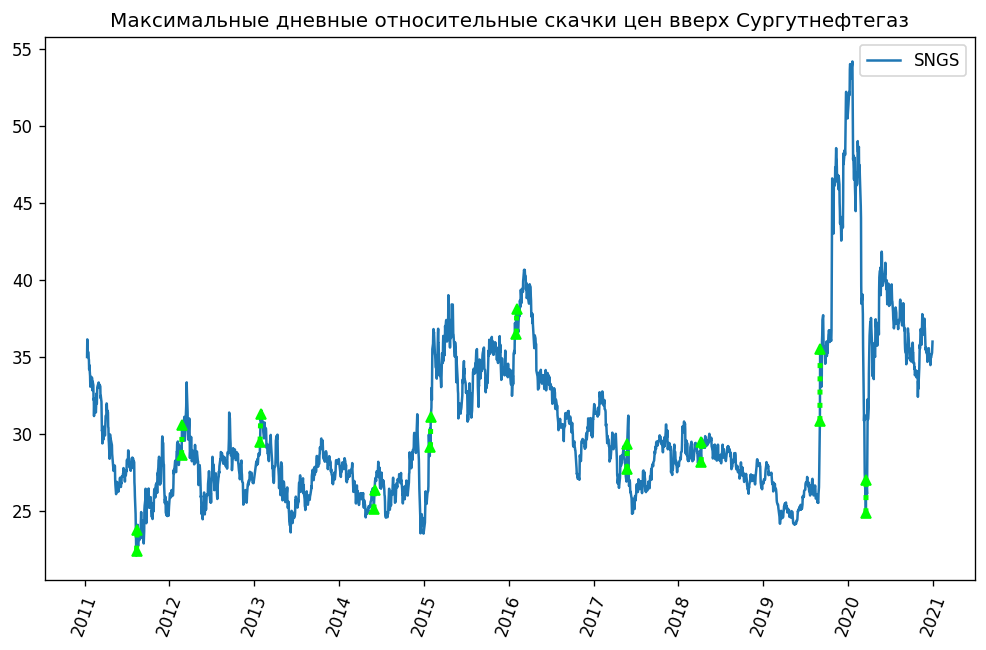

Время выполнения: 0.28 секунд


In [ ]:
start_time = time.time()

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 120

ticker = data[3] # SNGS
points = pd.to_numeric(ticker.groupby(ticker['<DATE>'].dt.year)['<JUMP>'].agg(['idxmax'])['idxmax'])

plt.plot(ticker['<DATE>'], ticker['<CLOSE>'], label='SNGS')
for i in points:
  plt.plot([ticker['<DATE>'][i-1],ticker['<DATE>'][i]], [ticker['<CLOSE>'][i-1], ticker['<CLOSE>'][i]], '^:', color='lime', linewidth=3, markersize=6)

plt.title("Максимальные дневные относительные скачки цен вверх Сургутнефтегаз")
plt.xticks(rotation=70)
plt.legend()
plt.show()

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.28 секунд

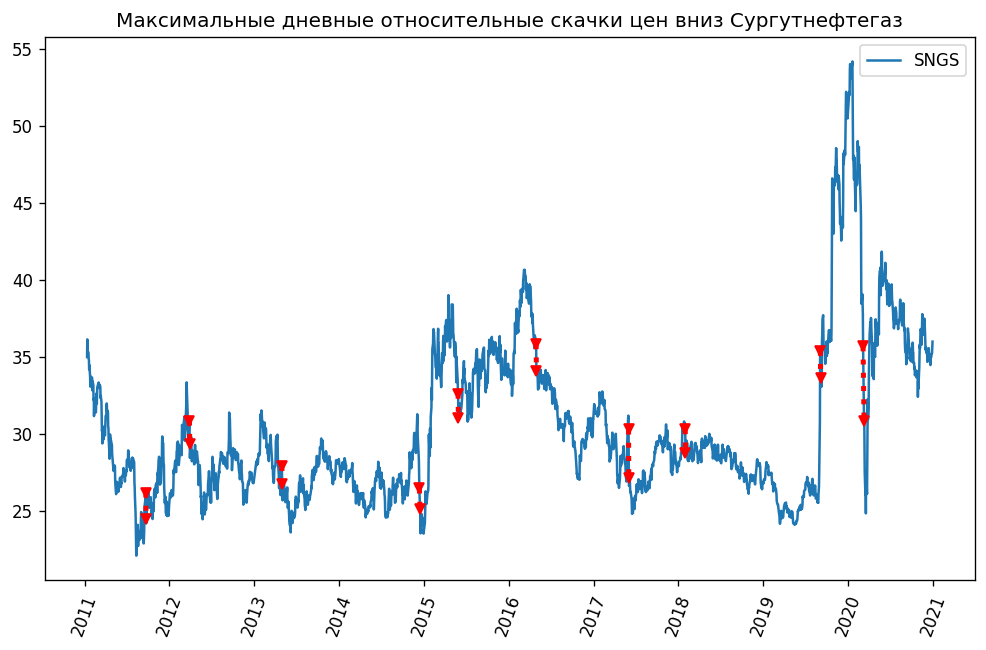

Время выполнения: 0.28 секунд


In [ ]:
start_time = time.time()

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 120

ticker = data[3] # SNGS
points = pd.to_numeric(ticker.groupby(ticker['<DATE>'].dt.year)['<JUMP>'].agg(['idxmin'])['idxmin'])

plt.plot(ticker['<DATE>'], ticker['<CLOSE>'], label='SNGS')
for i in points:
  plt.plot([ticker['<DATE>'][i-1],ticker['<DATE>'][i]], [ticker['<CLOSE>'][i-1], ticker['<CLOSE>'][i]], 'v:', color='red', linewidth=3, markersize=6)

plt.title("Максимальные дневные относительные скачки цен вниз Сургутнефтегаз")
plt.xticks(rotation=70)
plt.legend()
plt.show()

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.28 секунд

# Проверка для модельных данных

In [ ]:
start_time = time.time()

days = 250 # среднее число торговых дней
shapiro_Ws, shapiro_ps = [], []
for j in range(1000): # количество экспериментов для Шапиро-Уилка
  data = scipy.stats.norm.rvs(size=days) # генерация данных нормального распределения размера среднего числа торговых дней
  shapiro_W, shapiro_p = scipy.stats.shapiro(data) # основной Шапиро-Уилка
  shapiro_Ws.append(shapiro_W)
  shapiro_ps.append(shapiro_p)
kstest_D, kstest_p = scipy.stats.kstest(shapiro_ps, 'uniform') # вспомогательный Колмагорова для проверки равномерного распределения p-значений Шапиро-Уилка
print("Полученное p-значение Колмогорова:", kstest_p)

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.01 секунд

Полученное p-значение Колмогорова: 0.968771930022196
Время выполнения: 0.09 секунд


## Среднее p-значение (удалено)

In [ ]:
start_time = time.time()

years = 5000 # количество экспериментов для Шапиро-Уилка
days = 250 # среднее число торговых дней

kstest_ps = []
for i in range(1000): # количество экспериментов для Колмагорова
  shapiro_Ws, shapiro_ps = [], []
  for j in range(years): # количество экспериментов для Шапиро-Уилка
    data = scipy.stats.norm.rvs(size=days) # генерация данных нормального распределения размера среднего числа торговых дней
    shapiro_W, shapiro_p = scipy.stats.shapiro(data) # основной Шапиро-Уилка
    shapiro_Ws.append(shapiro_W)
    shapiro_ps.append(shapiro_p)
  kstest_D, kstest_p = scipy.stats.kstest(shapiro_ps, 'uniform') # вспомогательный Колмагорова для проверки равномерного распределения p-значений Шапиро-Уилка
  kstest_ps.append(kstest_p)
print("Полученное p-значение Колмогорова:", statistics.mean(kstest_ps))

all = len(kstest_ps)
accept = len([i for i in kstest_ps if i > 0.05])
accept_perc = round(accept/all, 2)
print("Число p-значений Колмогорова больше 0.05:", accept, "из", all, "или", accept_perc)

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 1.2 секунд

Ожидаемое p-значение Колмогорова: 0.5290319417798177
Число p-значений Колмогорова больше 0.05: 947 из 1000 или 0.95
Время выполнения: 1.2 секунд


# Гистограмма p-значений

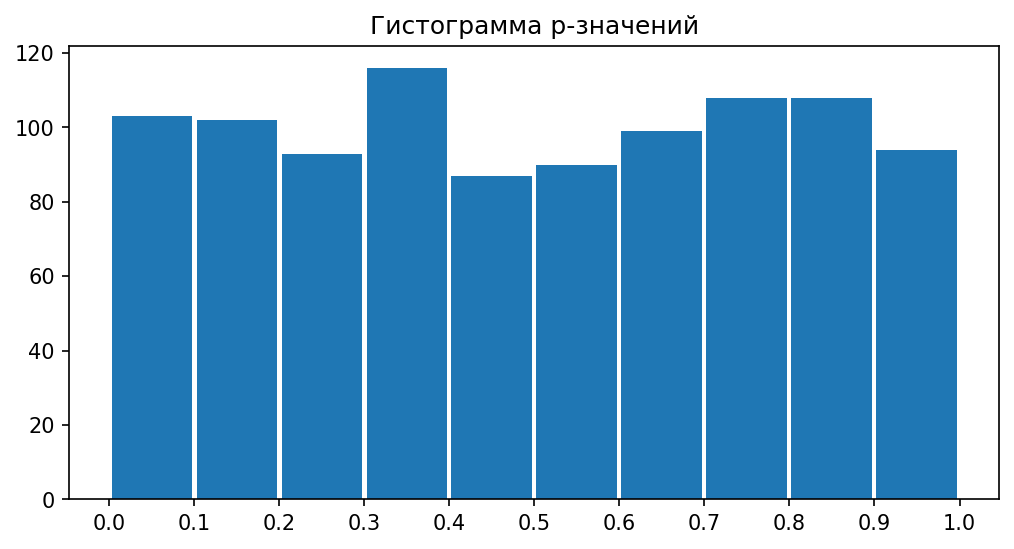

Время выполнения: 0.22 секунд


In [ ]:
start_time = time.time()

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['figure.dpi'] = 150

plt.title('Гистограмма р-значений')
plt.hist(shapiro_ps, rwidth=0.95)
ticks = np.arange(0,1.1,0.1)
plt.xticks(list(np.arange(0,1.1,0.1)), map(lambda x: round(x, 1), ticks))

plt.show()

print('Время выполнения:', round(time.time()-start_time, 2), 'секунд') # Время выполнения: 0.22 секунд

# Квантили статистики выборки

In [ ]:
starttime = time.time()

quantiles = pd.DataFrame(shapiro_Ws, columns=['Квантили']).quantile(np.arange(0,1.1,0.1))

print('Время:', round(time.time()-starttime, 3), 'секунд') # Время: 0.003 секунд

quantiles

Время: 0.003 секунд


,Квантили
0.0,0.977852
0.1,0.990415
0.2,0.992008
0.3,0.993107
0.4,0.993773
0.5,0.994485
0.6,0.995094
0.7,0.995643
0.8,0.996187
0.9,0.996796
